   # The 2017 Halloween Candy Hierarchy Ranking

<img src="Candy_pic.png" width="400">

## What do we know?

* Online Survey Conducted in 2017 to see how people feel about different types of candies 
* Over 100 Candy types given as an option
* Almost 2500 voters participated
* How do the voters feel?
    * JOY, MEH or DESPAIR
* Other datas collected include age, gender, state and country

# Which candies are most popular?

* We want to caculate which candies are most popular or well liked
* We assign a point system of 3, 1 and 0 for JOY, DESPAIR and MEH respectively
* Add up total points for each candy type
* Generate total scores for each candy type by summing up the individual scores 
* Inputs are gender, nationality and candy feelings
* What is the gender distribution among the participants?
* What does the score look like for CO participants? 

In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
candyData = pd.read_csv('candyhierarchy2017.csv',encoding = 'ISO-8859-1')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
candyData.set_index('Internal ID', inplace = True)
candyData = candyData.rename(columns={'Q3: AGE': 'Age', 'Q1: GOING OUT?': 'Going_out', 'Q2: GENDER': 'Gender'} )

In [54]:
candyData.sample(5)

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90274337,No,Other,312,Canada,BC,MEH,MEH,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,MEH,JOY,DESPAIR,...,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,MEH,MEH,JOY,MEH,MEH,MEH,JOY,The New Star Trek. Joy almond bars. Sugar cu...,pillow face. rubber bats. opening a pumpkin a...,I am Groot!,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(69, 23)"
90276367,No,Male,60,usa,"colorado, boulder",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90273440,No,Male,44,United States,UT,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,...,MEH,MEH,JOY,DESPAIR,MEH,MEH,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,Circus peanuts,NaN,White and gold,NaN,Friday,1.0,NaN,NaN,NaN,"(32, 41)"
90281108,No,Male,34,United States,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90277185,No,Female,43,United States,Florida,MEH,MEH,MEH,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,...,MEH,MEH,JOY,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,Pez,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(78, 28)"


# Cleaning activities

We will clean the Going out, Gender and Age columns first

   * Remove Strings from Age column
   * Dealing with outliers
   * Filling NA values
   * Some participants in the survey entered decimals, fractions and some ranges as age
       * 24-50, 45-55, 39.4 and 70 1/2 are some examples
   * Survey Participants mean age is 42

In [55]:
candyData['Age'] = candyData['Age'].str.replace('\D+', '')
candyData['Age'] = pd.to_numeric(candyData['Age'], errors='coerce')
candyData.Age.isnull().sum()

100

In [56]:
candyData['Age'] = candyData['Age'].replace(2450, np.mean((24,50)))
candyData['Age'] = candyData['Age'].replace(4555, np.mean((45,55)))
candyData['Age'] = candyData['Age'].replace(394, 39)
candyData['Age'] = candyData['Age'].replace(7012, 71)

candyData['Age'] = candyData.Age.mask((candyData['Age'] > 105), np.nan)
candyData['Age'] = candyData.Age.mask((candyData['Age'] < 3), np.nan)

In [57]:
mean_age = candyData['Age'].mean(skipna=True)
print(mean_age)
candyData['Age'].fillna(value = mean_age, inplace = True)
print(candyData.Age.isnull().sum())
candyData['Age'] = candyData['Age'].round(0).astype(int)

42.11799660441426
0


In [58]:
candyData['Gender'].describe()
candyData['Gender'].isnull().sum()
candyData['Gender'].unique()
candyData['Gender'] = candyData['Gender'].replace(np.NaN,'I\'d rather not say')
candyData['Going_out'] = candyData['Going_out'].replace(np.NaN,'I\'d rather not say')

# Cleaning Country
* This survey was avaliable Worldwide 
* Many different participants from around the World
* We are only interested in USA and Canada data
* Data from other country will be droped
* Structural Errors
    * Inconsistent capitalization and Typos
    * Many different entries for USA
       * few examples are (U.S.A, usa, US of A, America, etc.)

In [59]:
df_country=candyData['Q4: COUNTRY']

unique_country=candyData['Q4: COUNTRY'].unique()

unique_country

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', '35',
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', '46', 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', '45', 'United State', '32',
       'France', 'australia', 'A', 'Can', 'Canae', 'New York',
       'Trumpistan', 'Ireland', 'United Sates', '

In [60]:
candyData['Q4: COUNTRY']=candyData['Q4: COUNTRY'].str.lower()
usa={'usa', 'murica', 'us', 'united states','america', 'u.s','u s','u.s.', 'u s a', 'unite states', 'united state'}
canadas={'canada', 'can'}
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        for u in usa:
            if u in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'USA')
        for c in canadas:
            if c in element:
                candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,'Canada')
    
for element in candyData['Q4: COUNTRY']:
    if type(element) is not float:
        if 'USA' not in element and 'Canada' not in element:
            candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(element,np.NaN)
            
candyData = candyData[pd.notnull(candyData['Q4: COUNTRY'])]

# Cleaning State, Province and County
* Inconsistency with many of the data 
* People entering City or County
* We want to narrow it down to States 
* Many entering both the abbreviation and full State name 
* We will create key value pair for every state and city in the USA 
* Replace all inconsistent entry with correct abbriviation by searchng the dictionary 

In [61]:
state_dic = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO', 
             'Connecticut':'CT', 'Delaware':'DE', 'Florida':'FL', 'Georgia':'GA', 'Hawaii':'HI', 'Idaho':'ID', 
             'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY', 'Louisiana':'LA', 
             'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN', 'Mississippi':'MS', 
             'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'NewHampshire':'NH', 'NewJersey':'NJ', 
             'NewMexico':'NM', 'NewYork':'NY', 'NorthCarolina':'NC', 'NorthDakota':'ND', 'Ohio':'OH', 'Oklahoma':'OK', 
             'Oregon':'OR', 'Pennsylvania':'PA', 'RhodeIsland':'RI', 'SouthCarolina':'SC', 'SouthDakota':'SD', 
             'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA', 'Washington':'WA', 
             'WestVirginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY', 'AmericanSamoa':'AS', 'DistrictofColumbia':'DC', 
             'FederatedStatesofMicronesia':'FM', 'Guam':'GU', 'MarshallIslands':'MH', 'NorthernMarianaIslands':'MP', 
             'Palau':'PW', 'PuertoRico':'PR', 'VirginIslands':'VI'}

In [64]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])
            if element[:2] == state_dic[key] or element[-2:] == state_dic[key]:
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,state_dic[key])

In [65]:
candyData['Q5: STATE, PROVINCE, COUNTY, ETC']

Internal ID
90272821    NM
90272829    IA
90272840    OR
90272841    PA
90272853    CO
            ..
90314359    MD
90314580    NE
90314634    TN
90314658    NC
90314802    IA
Name: Q5: STATE, PROVINCE, COUNTY, ETC, Length: 2263, dtype: object

In [66]:
ca_state_dic = {'Ontario':'ON', 'Quebec':'QC', 'NovaScotia':'NS', 'New Brunswick':'NB',
                'Manitoba':'MB', 'BritishColumbia':'BC', 'PrinceEdward':'PE', 'Saskatchewan':'SK',
                'Alberta':'AB', 'NewfoundlandAndLabrador':'NL', 'NorthwestTerritories':'NT',
                'Yukon':'YT', 'Nunavut':'NU'}
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if type(element) is not float:
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element, element.upper().strip())
        for key in ca_state_dic:
            if key.upper() in element.replace(' ',''):
                candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,ca_state_dic[key])

In [67]:
for element in candyData['Q5: STATE, PROVINCE, COUNTY, ETC']:
    if element not in state_dic.values() and element not in ca_state_dic.values():
        candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(element,np.NaN)

# Replace NA values for Country and State with "I'd rather not say"

In [68]:
candyData['Q4: COUNTRY'] = candyData['Q4: COUNTRY'].replace(np.NaN,'I\'d rather not say')

In [69]:
candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] = candyData['Q5: STATE, PROVINCE, COUNTY, ETC'].replace(np.NaN,'I\'d rather not say')

In [70]:
candyData.sample(5)

,Going_out,Gender,Age,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we donÕt know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,...,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
Internal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90276236,Yes,Male,13,USA,CA,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,...,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,NaN,Friday,1.0,NaN,NaN,NaN,"(47, 31)"
90281101,No,Female,42,Canada,AL,MEH,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,MEH,MEH,JOY,DESPAIR,...,MEH,MEH,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,Blue and black,NaN,Sunday,NaN,1.0,NaN,NaN,"(71, 45)"
90287147,No,Male,55,USA,OH,MEH,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,MEH,DESPAIR,...,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH,Buckeyes Maple syrup candy,Hard root beer candies shaped like a beer barrel,"BTW - ""Those odd marshmallow circus peanut thi...",NaN,NaN,Sunday,NaN,1.0,NaN,NaN,"(74, 6)"
90277018,No,Female,53,USA,TX,MEH,MEH,JOY,MEH,JOY,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,MEH,MEH,JOY,JOY,JOY,JOY,DESPAIR,DESPAIR,...,JOY,MEH,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,MEH,NaN,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(74, 27)"
90277817,No,Female,42,USA,MA,MEH,DESPAIR,JOY,NaN,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,JOY,NaN,MEH,MEH,DESPAIR,...,MEH,JOY,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,MEH,Reese's big cups,white chocolate anything,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 32)"


# Irrelevant observations

* We will drop datas we don't need

In [71]:
candyData.drop('Q7: JOY OTHER', axis=1, inplace=True)
candyData.drop('Q8: DESPAIR OTHER', axis=1, inplace=True)
candyData.drop('Q9: OTHER COMMENTS', axis=1, inplace=True)
candyData.drop('Q10: DRESS', axis=1, inplace=True)
candyData.drop('Unnamed: 113', axis=1, inplace=True)
candyData.drop('Q11: DAY', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Daily Dish]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Science]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [ESPN]', axis=1, inplace=True)
candyData.drop('Q12: MEDIA [Yahoo]', axis=1, inplace=True)
candyData.drop('Click Coordinates (x, y)', axis=1, inplace=True)

In [72]:
gender_count = candyData['Gender'].value_counts()
gender_count
gender_count_df = pd.DataFrame(data=gender_count)

# Gender Distribution Plot

In [73]:
gender_count_df

,Gender
Male,1372
Female,793
I'd rather not say,71
Other,27


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1caec978>],
      dtype=object)

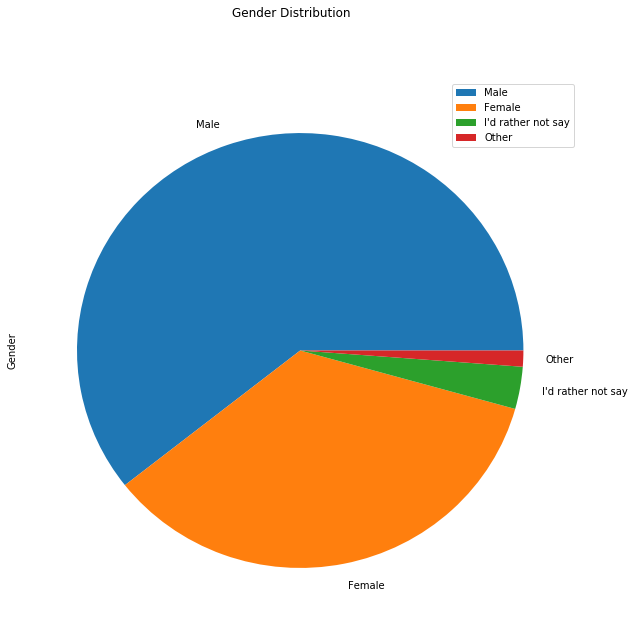

In [74]:
matplotlib.rcParams['figure.figsize'] = 10, 10
gender_count_df.plot.pie(subplots=True,title='Gender Distribution')

In [25]:
candyRank = candyData.drop(candyData.columns[0:5], axis=1, inplace=False)
candyRank.replace('JOY', 3, inplace=True)
candyRank.replace('MEH',1, inplace=True)
candyRank.replace('DESPAIR',0, inplace=True)

# Candy scores and ranking for USA and Canada

In [26]:
candyScore = candyRank.sum()
candyScore_df = pd.DataFrame(data=candyScore, columns=['score'])
candyScore_df.sort_values(by = ['score'], ascending = False)

,score
Q6 | Any full-sized candy bar,4599.0
Q6 | ReeseÕs Peanut Butter Cups,4430.0
Q6 | Kit Kat,4370.0
"Q6 | Cash, or other forms of legal tender",4341.0
Q6 | Twix,4279.0
...,...
Q6 | Kale smoothie,455.0
Q6 | Real Housewives of Orange County Season 9 Blue-Ray,386.0
Q6 | Gum from baseball cards,333.0
Q6 | White Bread,310.0


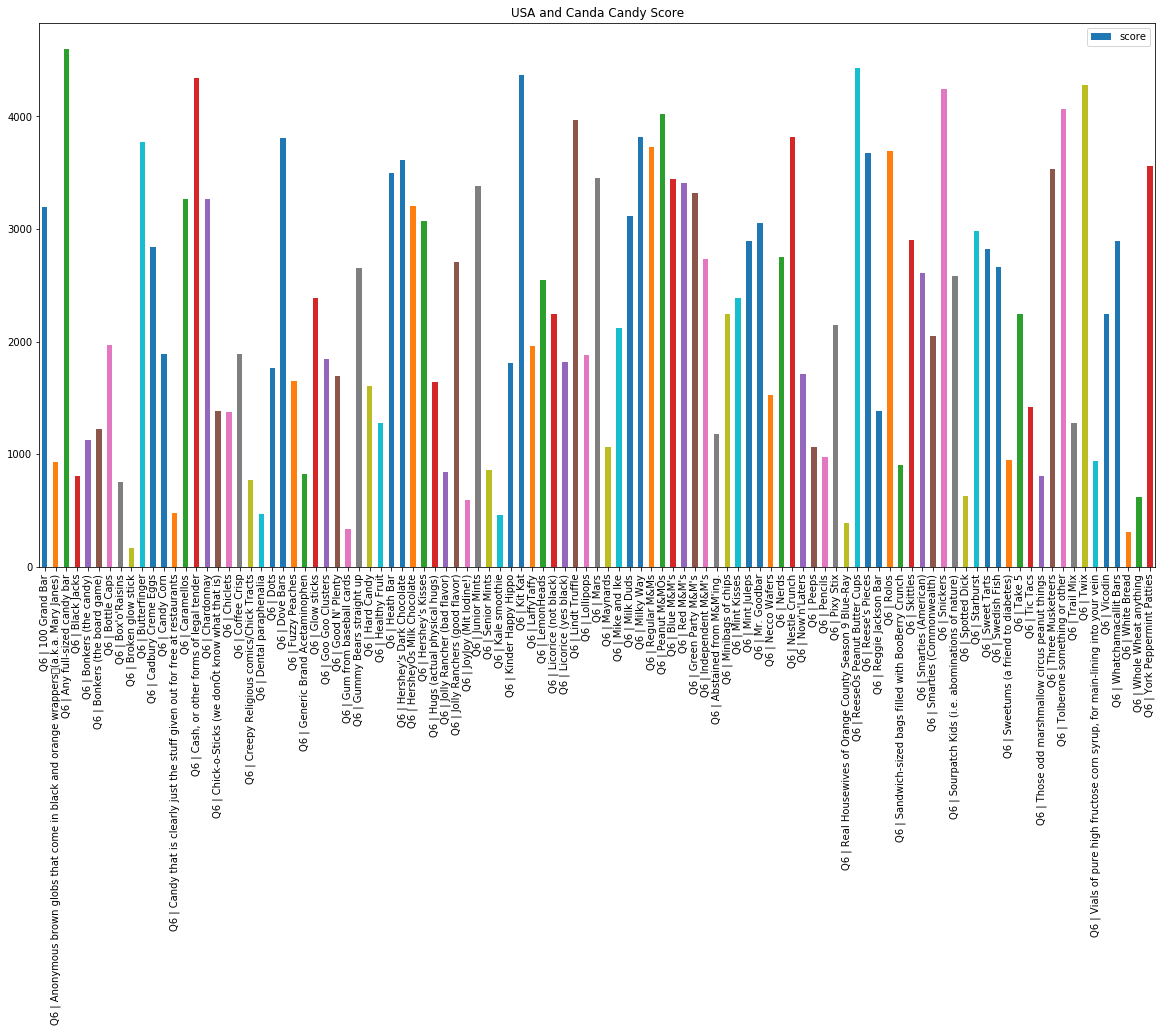

In [27]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['figure.figsize'] = 20, 10
candyScore_df.plot(kind='bar',y='score',title='USA and Canda Candy Score')

# Candy scores and ranking for Colorado

In [28]:
CO_data = candyData.loc[candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] == 'CO']
CO_Rank = CO_data.drop(candyData.columns[0:6], axis=1, inplace=False)
CO_Rank.replace('JOY', 3, inplace=True)
CO_Rank.replace('MEH',1, inplace=True)
CO_Rank.replace('DESPAIR',0, inplace=True)

In [29]:
CO_Score = CO_Rank.sum()
CO_Score_df = pd.DataFrame(data=CO_Score, columns=['score'])
CO_Score_df.sort_values(by = ['score'], ascending = False)

,score
Q6 | Any full-sized candy bar,137.0
Q6 | ReeseÕs Peanut Butter Cups,136.0
Q6 | Peanut M&MÕs,135.0
Q6 | Kit Kat,132.0
"Q6 | Cash, or other forms of legal tender",132.0
...,...
Q6 | Spotted Dick,12.0
Q6 | Gum from baseball cards,9.0
Q6 | Real Housewives of Orange County Season 9 Blue-Ray,8.0
Q6 | Broken glow stick,7.0


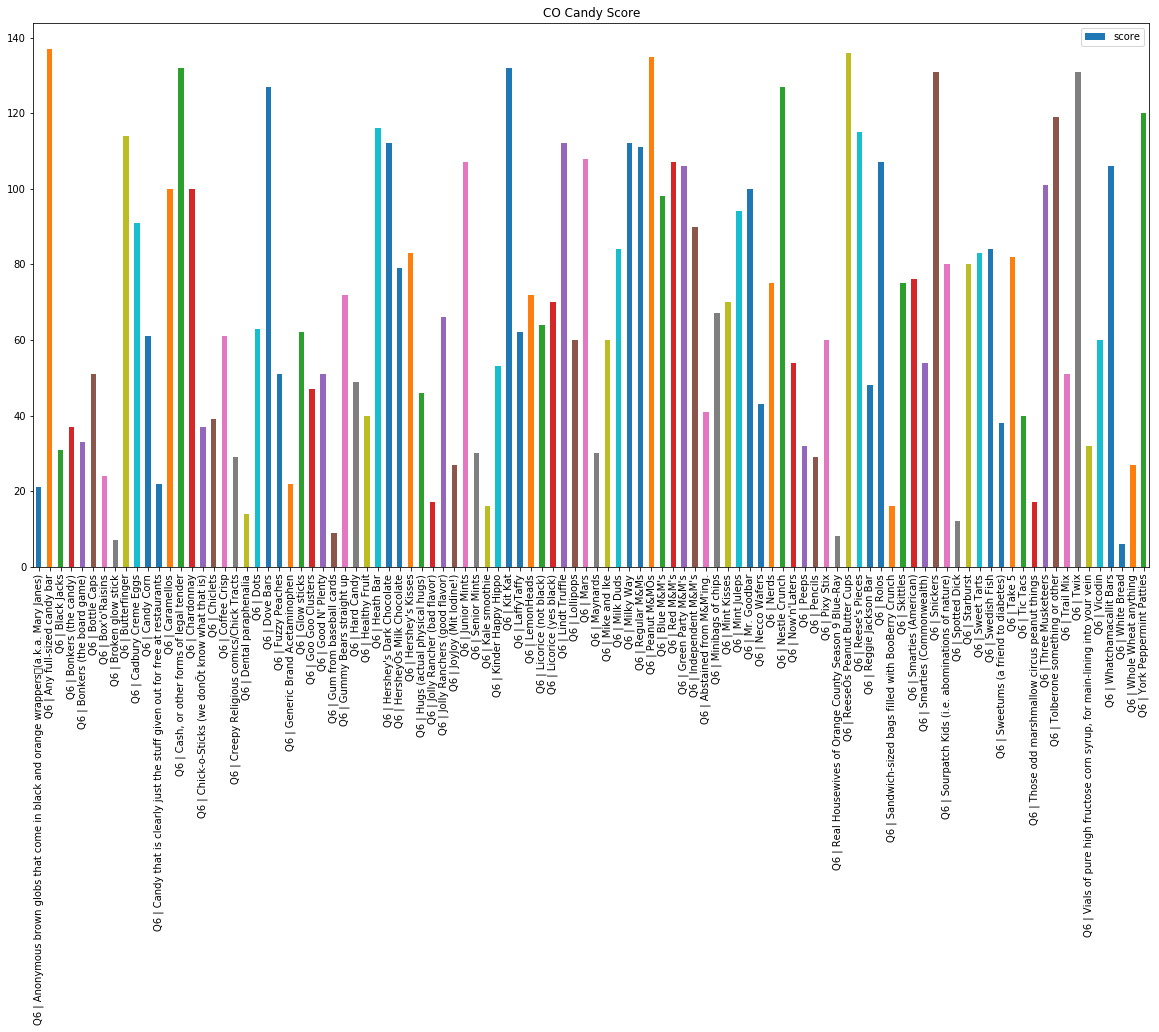

In [30]:
CO_Score_df.plot(kind='bar',y='score',title='CO Candy Score')

In [31]:
import seaborn as sns

In [32]:
CO_data = candyData.loc[candyData['Q5: STATE, PROVINCE, COUNTY, ETC'] == 'CO']
CO_Gender_Rank = CO_data.drop(candyData.columns[2:5], axis=1, inplace=False)
CO_Gender_Rank = CO_Gender_Rank.drop(CO_Gender_Rank.columns[0], axis=1, inplace=False)

In [33]:
CO_Gender_Rank.replace('JOY', 3, inplace=True)
CO_Gender_Rank.replace('MEH',1, inplace=True)
CO_Gender_Rank.replace('DESPAIR',0, inplace=True)

In [34]:
col_list= list(CO_Gender_Rank)
col_list.remove('Gender')
#col_list

# Participants ranking by Gender

In [35]:
CO_Gender_Rank['score'] = CO_Gender_Rank[col_list].sum(axis=1)
CO_Gender_Score = CO_Gender_Rank.drop(CO_Gender_Rank[col_list], axis=1, inplace=False)
CO_Gender_Score

,Gender,score
Internal ID,,
90272853,Male,0.0
90272881,Male,134.0
90272901,Male,208.0
90273053,Female,108.0
90273058,Male,131.0
...,...,...
90290159,Male,161.0
90298440,Female,108.0
90302275,Female,0.0


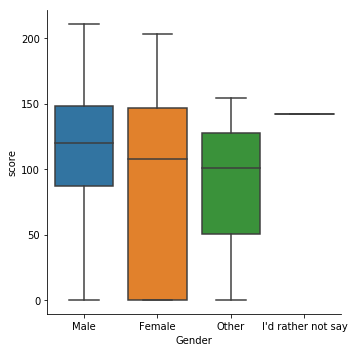

In [36]:
sns.catplot(x="Gender", y="score", kind="box", data=CO_Gender_Rank);